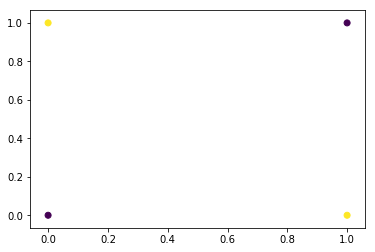

In [3]:
import numpy as np
import matplotlib.pyplot as plt

N = 4
D = 2

X = np.array([
    [0,0],
    [0,1],
    [1,0],
    [1,1]
])
T = np.array([0,1,1,0])

plt.scatter(X[:,0], X[:,1], c=T)
plt.show()

3.26651393063
2.66539845396
2.44201309423
2.27759608576
2.1446457362
2.03268424975
1.93553816191
1.84939223699
1.77181379646
1.70119187997
1.63641234498
1.57666827903
1.52134814941
1.46996889505
1.42213522831
1.37751437604
1.33582001639
1.29680176103
1.26023803036
1.22593104116
1.19370313762
1.16339399914
1.13485843808
1.10796460864
1.08259251301
1.05863273092
1.03598532296
1.01455887345
0.994269648366
0.975040850118
0.956801955075
0.939488122804
0.923039667859
0.90740158657
0.89252313237
0.878357434155
0.864861152847
0.85199417198
0.839719318624
0.828002111389
0.81681053265
0.806114822443
0.795887291776
0.786102153364
0.776735367986
0.767764504899
0.75916861488
0.75092811465
0.74302468154
0.735441157411


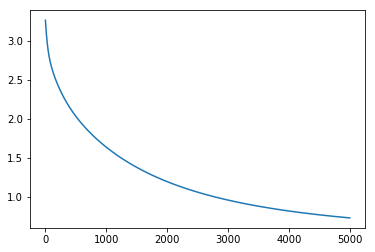

Final W: [-1.18593446 -6.62124081  2.8497639   2.84978486]
Final classification rate: 1.0


In [6]:
ones = np.array([[1]*N]).T

xy = np.matrix(X[:,0] * X[:,1]).T
Xb = np.array(np.concatenate((ones, xy, X), axis=1))

w = np.random.rand(D+2)

z = Xb.dot(w)

def sigmoid(z):
    return 1/(1 + np.exp(-z))

Y = sigmoid(z)

def cross_entropy(T, Y):
    E = 0
    for i in range(N):
        if T[i] == 1:
            E -= np.log(Y[i])
        else:
            E -= np.log(1 - Y[i])
    return E

learning_rate = 0.01
error = []

for i in range(5000):
    e = cross_entropy(T, Y)
    error.append(e)
    if i % 100 == 0:
        print(e)
        
    w += learning_rate * (np.dot((T-Y).T, Xb) - 0.01*w)
    
    Y = sigmoid(Xb.dot(w))
    
plt.plot(error)
plt.show()

print("Final W:", w)
print("Final classification rate:", 1 - np.abs(T - np.round(Y)).sum() / N)